<a href="https://colab.research.google.com/github/noambassat/SupremeCourtClassifier/blob/main/4_explore_and_merge_RAP_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import ast

In [25]:

# contains_raap = sample_df["גוף המסמך"].str.contains('רע"פ', na=False)

# # ספירה של כמה מסמכים מכילים את המילה רע"פ וכמה לא
# count_yes = contains_raap.sum()
# count_no = len(contains_raap) - count_yes

# # הדפסת הספירה
# print(f"מספר המסמכים שמכילים את המילה 'רע\"פ': {count_yes}")
# print(f"מספר המסמכים שלא מכילים את המילה 'רע\"פ': {count_no}")

# # סינון הדאטה לשמירת רק המסמכים שכן מכילות את המילה
# sample_df = sample_df[contains_raap]

# # שמירה לקובץ חדש אם יש צורך
# output_file = "filtered_sample_with_raap.csv"
# sample_df.to_csv(output_file, index=False, encoding="utf-8")
# print(f"הדאטה המסונן נשמר לקובץ: '{output_file}'")


In [26]:
full_final_df = pd.read_csv('full_final_df_cleaned.csv' )

In [27]:
full_final_df

,מספר תיק,מספר החלטות בתיק,שם הליך,שנת פתיחת ההליך,מספר הליך,סוג הליך,פירוט סוג הליך,תיק חסוי,תאריך אירוע אחרון,משך התיק בימים,...,Justice name 5,"מס סידורי של הפס""ד הממופים",מי ערער על החלטת המחוזי (ביחס למעמדו במחוזי),שם השופט הראשון במותב,"חודש קבלת פס""ד הנבחן",Justice 4’s activity,"יום קבלת פס""ד הנבחן",Justice 5’s activity,"שנת קבלת פס""ד הנבחן",Justice name 4
0,9917/02,12,"ע""פ 9917/02 אכרמ זהרה נ. מדינת ישראל",2002,"ע""פ 9917/02","ע""פ",ערעור פלילי,0.0,2007-09-25,1635,...,NaN,27.0,Defendant,Edmond Levy,May,NaN,17.0,NaN,2007.0,NaN
1,845/02,9,"ע""פ 845/02 מדינת ישראל נ. תנובה מרכז שיתופי לש...",2002,"ע""פ 845/02","ע""פ",ערעור פלילי,0.0,2008-01-09,2082,...,NaN,75.0,Plaintiff,Dorit Beinisch,October,NaN,10.0,NaN,2007.0,NaN
2,4379/02,2,"ע""פ 4379/02",2002,"ע""פ 4379/02","ע""פ",ערעור פלילי,1.0,1900-01-01,-2,...,Missing,18.0,Defendant,Misha'el Kheshin,January,Missing,18,Missing,2006.0,Missing
3,9059/03,6,"ע""פ 9059/03 אהרונ יוסבשוילי נ. מדינת ישראל",2003,"ע""פ 9059/03","ע""פ",ערעור פלילי,0.0,2007-03-25,1260,...,NaN,40.0,Defendant,Dorit Beinisch,March,NaN,21.0,NaN,2007.0,NaN
4,7075/03,24,"ע""פ 7075/03 אסתר אלונ נ. מדינת ישראל",2003,"ע""פ 7075/03","ע""פ",ערעור פלילי,0.0,2008-07-15,1095,...,Missing,26.0,Defendant,Edmond Levy,August,Missing,2,Missing,2006.0,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,4180/07,4,"רע""פ 4180/07 גאוי גאוי נ. מדינת ישראל",2007,"רע""פ 4180/07","רע""פ",רשות ערעור פלילי,0.0,2007-07-16,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748,8880/07,1,"רע""פ 8880/07 יעקב קרקו נ. מדינת ישראל",2007,"רע""פ 8880/07","רע""פ",רשות ערעור פלילי,0.0,2007-10-28,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749,5570/01,6,"ע""פ 5570/01 אסתר מיכאלי נ. מדינת ישראל",2001,"ע""פ 5570/01","ע""פ",ערעור פלילי,0.0,2007-03-01,2034,...,NaN,47.0,Defendant,Elyakim Rubinstein,February,NaN,5.0,NaN,2007.0,NaN
1750,7450/01,16,"ע""פ 7450/01 אשרפ אבו-ליטאפ נ. מדינת ישראל",2001,"ע""פ 7450/01","ע""פ",ערעור פלילי,0.0,2007-07-31,2136,...,NaN,1.0,Defendant,Dvora Berliner,July,NaN,31.0,NaN,2007.0,NaN


In [28]:
full_final_df['dca'].unique()

array([0, 1])

In [29]:
full_final_df[full_final_df['סוג הליך']=='ע"פ']['dca'].unique()

array([0])

In [30]:
full_final_df[full_final_df['סוג הליך']=='ע"פ']['Outcome of case'].unique()

array(['O R', 'O A', 'O RETURN TO COURT',
       'O Approved in part + Denied in part', 'O COMPROMISE VERDICT',
       'O R RETURN TO COURT', 'O WITHDRAWAL',
       'O approved in part + denied in part', 'O R COMPROMISE VERDICT',
       'O V', 'O R A', 'O A WITHDRAWAL'], dtype=object)

In [31]:
full_final_df[full_final_df['סוג הליך']=='רע"פ']['Outcome of case'].unique()

array(['G R',
       "G A Granted with the state's consent. The appeal itself was denied",
       'G A',
       'G R substential matter that was resolved with no consequences on the defendant (as the state consented)',
       'G V (vacated in part)', 'D A', 'D', 'O A',
       "G A at most- defendant was acquitted of one felony with plaintiff's consent. The sunction remained.",
       "D RETURN TO COURT Erased due to the fact that the procedure in the Magistrates Court wasn't finished",
       'Crim + Sent A G', 'G', 'G RETURN TO COURT',
       "G WITHDRAWAL V Appellant was aquitted of one felony with appellee's consent. The rest of the appeal was withdrawaled.",
       "G R partially, with appellee's consent", 'Crim + Sent A D',
       'Crim + Sub D A', 'Crim + Ev A D', 'Crim + Sub D',
       'D RETURN TO COURT denied but with option for the defendant to submitt an appeal again after the final verdict of the district court',
       'O V denied in part, merged with another procedure in 

In [32]:
######################################### עצרתי פה~!!!!

# Outcome of case drop null

In [33]:
full_final_df = full_final_df[["גוף המסמך","מספר תיק",'Outcome of case']].dropna(how='any', ignore_index=True)
full_final_df

,גוף המסמך,מספר תיק,Outcome of case
0,"['פסק דין בתיק ע""פ 9917/02 בבית המשפט העליון ב...",9917/02,O R
1,"['פסק-דין בתיק ע""פ 845/02 בבית המשפט העליון בש...",845/02,O R
2,"['פסק-דין בתיק ע""פ 4379/02 בבית המשפט העליון ב...",4379/02,O A
3,"['פסק דין בתיק ע""פ 9059/03 בבית המשפט העליון ב...",9059/03,O A
4,"['פסק-דין בתיק ע""פ 7075/03 בבית המשפט העליון ב...",7075/03,O A
...,...,...,...
1738,"['החלטה בתיק רע""פ 4180/07 בבית המשפט העליון רע...",4180/07,D A
1739,"['החלטה בתיק רע""פ 8880/07 בבית המשפט העליון רע...",8880/07,D A
1740,"['פסק דין בתיק ע""פ 5570/01 בבית המשפט העליון ב...",5570/01,O R RETURN TO COURT
1741,"['פסק דין בתיק ע""פ 7450/01 בבית המשפט העליון ב...",7450/01,O A


In [34]:
full_final_df["Outcome of case"].unique()

array(['O R', 'O A', 'O RETURN TO COURT',
       'O Approved in part + Denied in part', 'G R',
       'O COMPROMISE VERDICT', 'O R RETURN TO COURT', 'O WITHDRAWAL',
       'O approved in part + denied in part', 'O R COMPROMISE VERDICT',
       'G A',
       'G R substential matter that was resolved with no consequences on the defendant (as the state consented)',
       'G V (vacated in part)', 'D A', 'D', 'O V', 'O R A',
       "G A at most- defendant was acquitted of one felony with plaintiff's consent. The sunction remained.",
       "D RETURN TO COURT Erased due to the fact that the procedure in the Magistrates Court wasn't finished",
       'Crim + Sent A G', 'G', 'G RETURN TO COURT',
       "G WITHDRAWAL V Appellant was aquitted of one felony with appellee's consent. The rest of the appeal was withdrawaled.",
       'O A WITHDRAWAL', 'Crim + Sent A D', 'Crim + Sub D A',
       'Crim + Ev A D', 'Crim + Sub D',
       'D RETURN TO COURT denied but with option for the defendant to su

________________________________________
#Category: A (Accepted)
•	'O A'
•	'G A'
•	"G A at most- defendant was acquitted of one felony with plaintiff's consent. The sunction remained."
•	'Crim + Sent A G'
•	"G A with apellee's consent"
________________________________________
#Category: R (Rejected)
•	'O R'
•	'G R'
________________________________________
#Category: O (Other)
•	'O RETURN TO COURT'
•	'O Approved in part + Denied in part'
•	'O COMPROMISE VERDICT'
•	'O R RETURN TO COURT'
•	'O WITHDRAWAL'
•	'O approved in part + denied in part'
•	'O R COMPROMISE VERDICT'
•	'O V'
•	'O R A'
•	'O A WITHDRAWAL'
•	'O V denied in part, merged with another procedure in part.'
•	'Crim + Sent V Erased (became irrelevant)'
•	"Crim + Pro V Erased due to the fact that the procedures un the Magistrates Court wasn't finished"
•	'G'
•	'G RETURN TO COURT'
•	"G WITHDRAWAL V Appellant was aquitted of one felony with appellee's consent. The rest of the appeal was withdrawaled."
•	'G V (vacated in part)'
•	'G R substential matter that was resolved with no consequences on the defendant (as the state consented)'
•	"G V RETURN TO COURT with appellee's consent"
•	'G V verdict vacated in part'
•	"G R partially and with the state's consent"
•	"G R with the state's consent"
•	'O R approved in part + denied in part'
•	'G A Denied at most'
•	'G R A the appellant was acquitted of some felonies but the punishment remained the same.'
•	"G A Granted with the state's consent, the appeal itself was rejected"
#DROP FROM DATA –
•	'D A'
•	'D’
•	'Crim + Sub D A'
•	'Crim + Ev A D'
•	'Crim + Sub D'
•	'Crim + Sent D'
•	'Crim + Ev D'
•	'Crim + Pro D'
•	'D A V'
•	'D R'
•	"D RETURN TO COURT Erased due to the fact that the procedure in the Magistrates Court wasn't finished"
•	"D RETURN TO COURT denied but with option for the defendant to submitt an appeal again after the final verdict of the district court"
•	'D RETURN TO COURT'
•	"D denied because the procedure hasn't ended yet. The appellant can appeal again after the sentencing"
•	"D A former proceedings hasn't ended yet- the appeal was denied with an option to appeal again after it will end"
•	"D V Former proceeding has not ended yet- the appeal was denied with an option for the defendant to appeal again after the proceeding will end"
•	"D V"
•	'Crim + Pro D A'




In [35]:
full_final_df["Outcome of case"].value_counts()

,count
Outcome of case,
O A,744
D A,505
O R,217
D,109
G A,18
Crim + Sent A D,18
O Approved in part + Denied in part,17
Crim + Sub A D,10
G R,9


In [37]:
# הוספת עמודת הקטגוריה לדאטה
full_final_df['outcome_category'] = full_final_df['Outcome of case'].apply(classify_outcome)

# הצגת הערכים בכל קטגוריה עם Value Count
for category in ["A", "R", "O", "DROP"]:
    print(f"\nCategory '{category}':")
    print("=" * 80)

    # סינון הנתונים לפי הקטגוריה
    category_df = full_final_df[full_final_df['outcome_category'] == category]

    # חישוב התפלגות הערכים
    value_counts = category_df['Outcome of case'].value_counts()

    # הדפסת התפלגות הערכים
    for value, count in value_counts.items():
        print(f"Value: {value}, Count: {count}")

    # סיכום קטגוריה
    print(f"\nTotal unique values in category '{category}': {len(value_counts)}")
    print(f"Total entries in category '{category}': {value_counts.sum()}")
    print("=" * 80)

# התפלגות כללית של הקטגוריות
print("\nOverall distribution of outcome categories:")
print(full_final_df['outcome_category'].value_counts())



Category 'A':
Value: O A, Count: 744
Value: G A, Count: 18
Value: G A at most- defendant was acquitted of one felony with plaintiff's consent. The sunction remained., Count: 1
Value: G A with apellee's consent, Count: 1

Total unique values in category 'A': 4
Total entries in category 'A': 764

Category 'R':
Value: O R, Count: 217
Value: G R, Count: 9
Value: Crim + Sub G R, Count: 1
Value: G R RETURN TO COURT, Count: 1

Total unique values in category 'R': 4
Total entries in category 'R': 228

Category 'O':
Value: O Approved in part + Denied in part, Count: 17
Value: O COMPROMISE VERDICT, Count: 9
Value: O R RETURN TO COURT, Count: 7
Value: O WITHDRAWAL, Count: 5
Value: G RETURN TO COURT, Count: 3
Value: O approved in part + denied in part, Count: 3
Value: O R COMPROMISE VERDICT, Count: 3
Value: O V, Count: 2
Value: G, Count: 2
Value: O RETURN TO COURT, Count: 2
Value: O R A, Count: 1
Value: G V (vacated in part), Count: 1
Value: G R substential matter that was resolved with no conseq

In [38]:
def print_cases_from_category(df, categories_to_check):
    """
    הדפסת תיקים מגוף המסמך לפי קטגוריות נבחרות

    Args:
    df (DataFrame): דאטה המכיל את התיקים
    categories_to_check (list): רשימת קטגוריות לבדיקה

    Returns:
    None
    """
    # סינון השורות לפי הקטגוריות הרצויות
    filtered_cases = df[df['Outcome of case'].isin(categories_to_check)]

    if filtered_cases.empty:
        print("No cases found for the selected categories.")
        return

    # הדפסת כל תיק מגוף המסמך
    print(f"Cases for categories: {categories_to_check}")
    print("=" * 80)

    for i, (index, row) in enumerate(filtered_cases.iterrows(), 1):
        print(f"\nCase {i}:")
        print("-" * 80)
        print("Index in Original Data:", index)
        print("\nOutcome of Case:", row['Outcome of case'])
        print("\nDocument Body:")
        # פיצול גוף המסמך למקטעים לקריאה נוחה
        formatted_text = "\n".join(row["גוף המסמך"][j:j + 80] for j in range(0, len(row["גוף המסמך"]), 80))
        print(formatted_text)
        print("-" * 80)

    print("=" * 80)

# קטגוריות לבדיקה
categories_to_check = ["Crim + Sent A G", "G A with apellee's consent"]

# קריאה לפונקציה עם הנתונים והקטגוריות
print_cases_from_category(full_final_df, categories_to_check)


Cases for categories: ['Crim + Sent A G', "G A with apellee's consent"]

Case 1:
--------------------------------------------------------------------------------
Index in Original Data: 445

Outcome of Case: Crim + Sent A G

Document Body:
['פסק-דין בתיק רע"פ 10833/05 בבית המשפט העליון רע"פ 10833/05 בפני: כבוד השופט א\
' א\' לוי כבוד השופטת מ\' נאור כבוד השופטת ד\' ברלינר המבקש: חליל דבס נ ג ד המשי
בה: מדינת ישראל בקשת רשות ערעור על פסק דינו של בית המשפט המחוזי בנצרת, מיום 15.1
1.05, בתיק ע"פ 1174/05, שניתן על ידי כבוד השופטים י\' כהן, ה\' ח\'טיב, א\' הלמן 
תאריך הישיבה: ב\' בכסלו התשס"ז (23.11.06) בשם המבקש: עו"ד לידאוי ויסאם בשם המשיב
ה עו"ד אליעד וינשל פסק-דין השופט א\' א\' לוי: המבקש נשא אישה שנייה בעת שהיה נשוי
לאחרת, ובעקבות כך הובא לדין ובית משפט השלום בנצרת הרשיעו בעבירה של ריבוינישואין 
לפי סעיף 176 לחוק העונשין, התשל"ז-1977. בהמשך, נגזר עונשו של המבקשלשמונה עשר חוד
שי מאסר ושישה חודשים מאסר על-תנאי. המבקש, שלא השלים עם גזר-הדין,הביא את השגותיו 
בפני בית המשפט המחוזי, שם הוחלט

In [48]:
full_final_df[full_final_df['outcome_category']=='Drop']

,גוף המסמך,מספר תיק,Outcome of case,outcome_category


In [42]:
full_final_df = full_final_df[full_final_df["outcome_category"]!=None]

In [43]:
full_final_df.shape

(1743, 4)

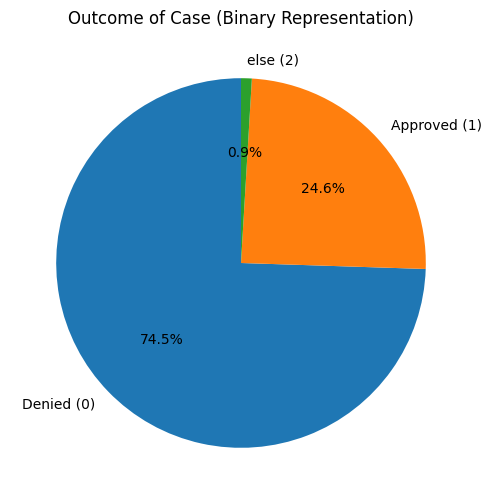

In [ ]:
# ספירת הערכים הבינאריים בעמודת binary_outcome
numeric_outcome = full_final_df['outcome_category'].value_counts()

labels = ['Accepted (A)','Rejected (R)','Other (O)']

plt.figure(figsize=(6, 6))
plt.pie(numeric_outcome, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Outcome of Case (Binary Representation)')

plt.show()

In [ ]:
numeric_outcome

,count
numeric_outcome,
1.0,794
0.0,262
2.0,10


In [62]:
# שינוי שם העמודה מ-'numeric_outcome' ל-'binary_outcome'
full_final_df.rename(columns={'numeric_outcome': 'binary_outcome'}, inplace=True)

# הסרת שורות שבהן הערך בעמודת 'binary_outcome' הוא 2.0
full_final_df = full_final_df[full_final_df['binary_outcome'].isin([0.0, 1.0])]

# בדיקת התפלגות חדשה לאחר השינויים
print("התפלגות בעמודת 'binary_outcome' לאחר הסרת קטגוריה 2:")
print(full_final_df['binary_outcome'].value_counts())


התפלגות בעמודת 'binary_outcome' לאחר הסרת קטגוריה 2:
binary_outcome
1.0    794
0.0    262
Name: count, dtype: int64


In [ ]:
file_path = 'full_final_df.csv'  # נתיב לשמירה
full_final_df.to_csv(file_path, index=False, encoding='utf-8')

print(f"הקובץ נשמר בהצלחה בנתיב: {file_path}")

הקובץ נשמר בהצלחה בנתיב: full_final_df.csv


###

In [ ]:
full_final_df.head()

גוף המסמך  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  